In this notebook I will read the txt file disseminated data output from EK80 200 kHz

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import array as arr
import datetime


In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Echosounder data
Output from EK80 :
    These are not the raw data, but the averages of the backscatter signal over the duration of each EK80 sample (which here lasts 10 min). The averages are presented for 20 depth layers (columns WBT_L00 to WBT_L019), each layer corresponds to 1/20th of the max depth in the EK80 settings (in this case 200m, so 10m per layer

In [17]:
data = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SBIskant_PF.xlsx', header=0,usecols='A,B,C,S:AR')
#data.columns = ['Time', 'Lat', 'Lon', 'WBT_L00', 'WBT_L01', 'WBT_L02', 'WBT_L03', 'WBT_L04', 'WBT_L05', 'WBT_L06', 'WBT_L07', 'WBT_L08', 'WBT_L09', 'WBT_L10', 'WBT_L11', 'WBT_L12', 'WBT_L13', 'WBT_L14', 'WBT_L15', 'WBT_L16', 'WBT_L17', 'WBT_L18', 'WBT_L19']
data

,Time,Lat,Long,WBT_L00,WBT_L01,WBT_L02,WBT_L03,WBT_L04,WBT_L05,WBT_L06,...,WBT_L11,WBT_L12,WBT_L13,WBT_L14,WBT_L15,WBT_L16,WBT_L17,WBT_L18,WBT_L19,Column1
0,2021-04-15 12:18:10,60.34155,5.35554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-15 12:20:00,60.34155,5.35557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-16 07:53:11,60.34152,5.35551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-16 07:55:00,60.34152,5.35554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-16 08:00:00,60.34155,5.35551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2021-06-09 04:00:00,75.65826,32.59521,-64.0,-76.0,-82.0,-88.0,-88.0,-88.0,-88.0,...,-82.0,-82.0,-82.0,-82.0,-76.0,-76.0,-82.0,-76.0,-76.0,NaN
1535,2021-06-09 04:30:00,75.66744,32.60208,-64.0,-76.0,-82.0,-88.0,-88.0,-88.0,-88.0,...,-82.0,-82.0,-82.0,-82.0,-82.0,-76.0,-76.0,-76.0,-76.0,NaN
1536,2021-06-09 05:00:00,75.67494,32.61183,-70.0,-82.0,-82.0,-88.0,-88.0,-88.0,-88.0,...,-82.0,-82.0,-82.0,-82.0,-76.0,-76.0,-76.0,-76.0,-76.0,NaN
1537,2021-06-09 05:30:00,75.68316,32.61456,-76.0,-82.0,-82.0,-76.0,-82.0,-82.0,-88.0,...,-82.0,-82.0,-82.0,-82.0,-82.0,-76.0,-76.0,-76.0,-76.0,NaN


In [28]:
data['Time']

0      2021-04-15 12:18:10
1      2021-04-15 12:20:00
2      2021-04-16 07:53:11
3      2021-04-16 07:55:00
4      2021-04-16 08:00:00
               ...        
1534   2021-06-09 04:00:00
1535   2021-06-09 04:30:00
1536   2021-06-09 05:00:00
1537   2021-06-09 05:30:00
1538   2021-06-09 06:00:00
Name: Time, Length: 1539, dtype: datetime64[ns]

In [29]:
times = np.empty((len(data),), dtype=object)
lat = np.empty((len(data),))
lon = np.empty((len(data),))
sv = np.empty((len(data),20))
for ind in np.arange(len(data)):

    times[ind] = data['Time'][ind]
    lat[ind] = data['Lat'][ind]
    lon[ind] = data['Long'][ind]
    for ind_wbt in np.arange(19):
        
        sv[ind,ind_wbt] = data['WBT_L%02d' %ind_wbt][ind]
    

In [32]:
sv

array([[             nan,              nan,              nan, ...,
                     nan,              nan,  8.90052033e+001],
       [             nan,              nan,              nan, ...,
                     nan,              nan,  2.84832276e+003],
       [             nan,              nan,              nan, ...,
                     nan,              nan,  9.11513284e+004],
       ...,
       [-7.00000000e+001, -8.20000000e+001, -8.20000000e+001, ...,
        -7.60000000e+001, -7.60000000e+001,  7.01573217e-322],
       [-7.60000000e+001, -8.20000000e+001, -8.20000000e+001, ...,
        -7.60000000e+001, -7.60000000e+001,  7.01573217e-322],
       [-7.60000000e+001, -8.80000000e+001, -8.80000000e+001, ...,
        -7.60000000e+001, -7.60000000e+001,  5.58294180e-322]])

In [36]:
depths = np.linspace(0,150,20)

Text(0.5, 1.0, 'Sailbuoy EK80 200 kHz - Polar Front Survey')

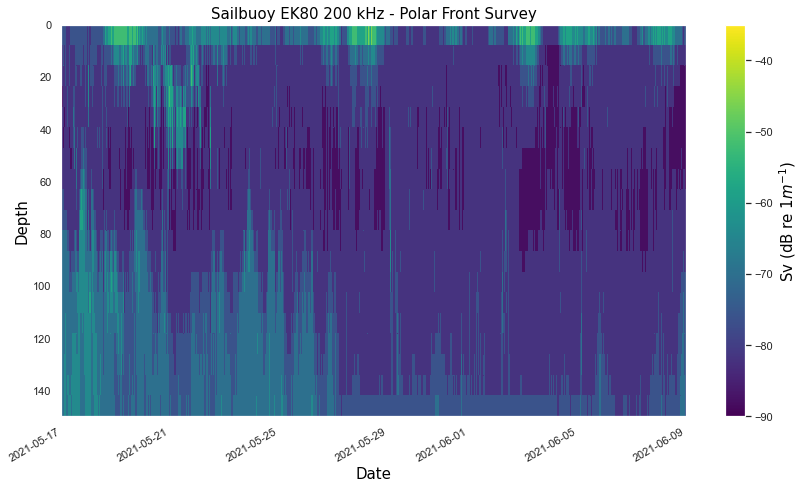

In [47]:
fig, ax = plt.subplots(figsize=(14,8))
c=ax.pcolor(times, depths, sv.T, cmap='viridis',vmin=-35, vmax=-90)
plt.ylim([150,0])
fig.autofmt_xdate()
plt.xlim([datetime.date(2021,5,17), datetime.date(2021,6,9)])
cbar = fig.colorbar(c)
plt.xlabel('Date', axis_font)
plt.ylabel('Depth', axis_font)
cbar.ax.set_ylabel('Sv (dB re 1$m^{-1}$)', axis_font);
plt.title('Sailbuoy EK80 200 kHz - Polar Front Survey', title_font)

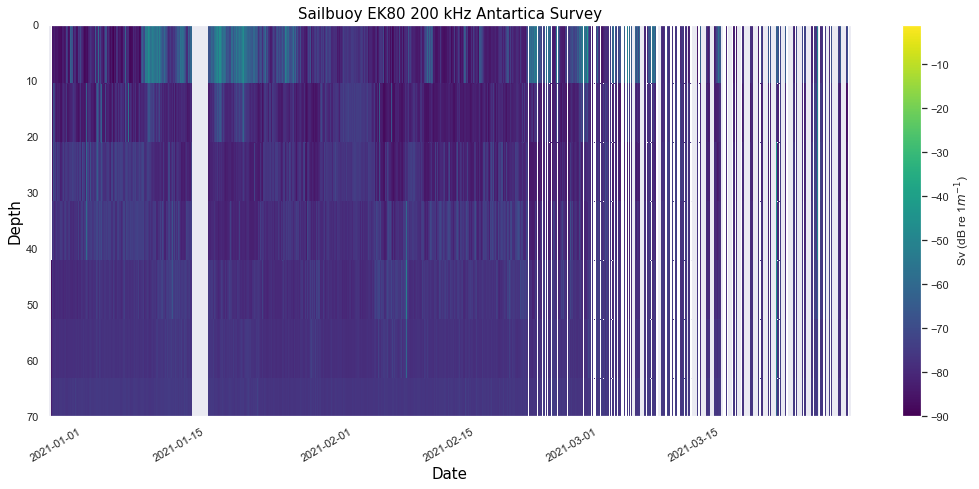

In [83]:
fig, ax = plt.subplots(figsize=(18,8))
c=ax.pcolor(times, depths, sv.T, cmap='viridis',vmin=-90, vmax =-1)
c.cmap.set_under('white')
plt.ylim([70,0])
fig.autofmt_xdate()
plt.xlim([datetime.date(2020,12,28), datetime.date(2021,3,30)])
cbar = fig.colorbar(c)
plt.xlabel('Date', axis_font)
plt.ylabel('Depth', axis_font)
cbar.ax.set_ylabel('Sv (dB re 1$m^{-1}$)');
plt.title('Sailbuoy EK80 200 kHz Antartica Survey', title_font);

Starting on February 22nd some of the "on" times are returning no data

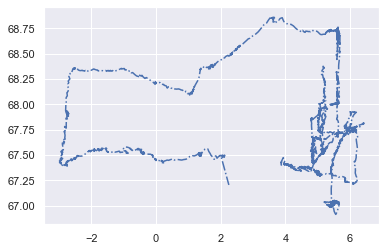

In [10]:
plt.plot(lon,lat, '-.')

## Plot without nan lines

In [90]:
sv_clean = sv.T[:,~np.isnan(sv.T[1,:])]
times_clean = times[~np.isnan(sv.T)[1,:]]
sv_clean = np.reshape(sv_clean,(np.shape(depths)[0],np.shape(times_clean)[0]))


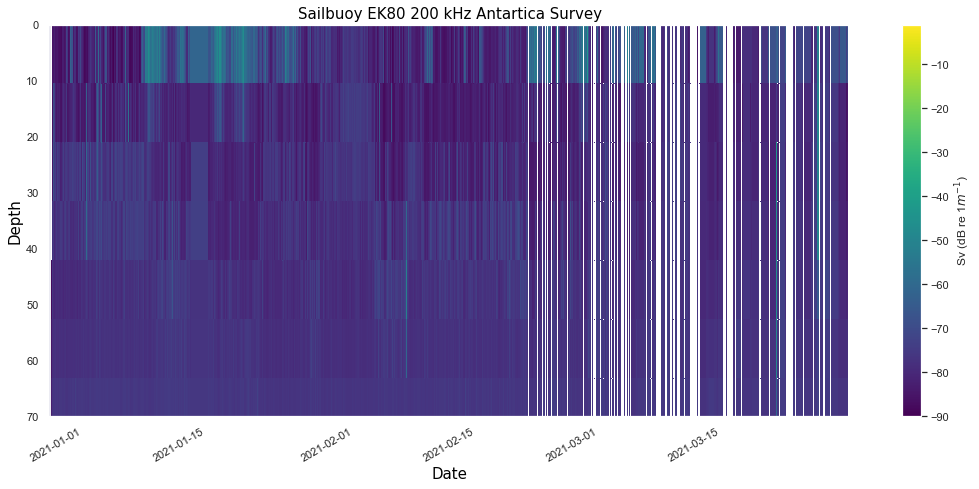

In [91]:
fig, ax = plt.subplots(figsize=(18,8))
c=ax.pcolor(times_clean, depths, sv_clean, cmap='viridis',vmin=-90, vmax =-1)
plt.ylim([70,0])
fig.autofmt_xdate()
plt.xlim([datetime.date(2020,12,28), datetime.date(2021,3,30)])
cbar = fig.colorbar(c)
plt.xlabel('Date', axis_font)
plt.ylabel('Depth', axis_font)
cbar.ax.set_ylabel('Sv (dB re 1$m^{-1}$)');
plt.title('Sailbuoy EK80 200 kHz Antartica Survey', title_font);

In [56]:
np.shape(times_clean)[0]

14284

In [77]:
sv_clean

array([[-103.845222, -103.665215, -103.839981, ...,    0.      ,
        -104.569229, -105.190575],
       [ -98.499153,  -98.538269,  -98.623421, ...,    0.      ,
         -97.867325,  -98.547188],
       [ -93.956528,  -94.027809,  -94.220016, ...,    0.      ,
         -93.388466,  -94.037735],
       ...,
       [ -64.033035,  -64.189575,  -64.244362, ...,    0.      ,
         -62.780762,  -63.403778],
       [ -62.546955,  -62.655655,  -62.744343, ...,    0.      ,
         -61.271156,  -61.96981 ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ]])